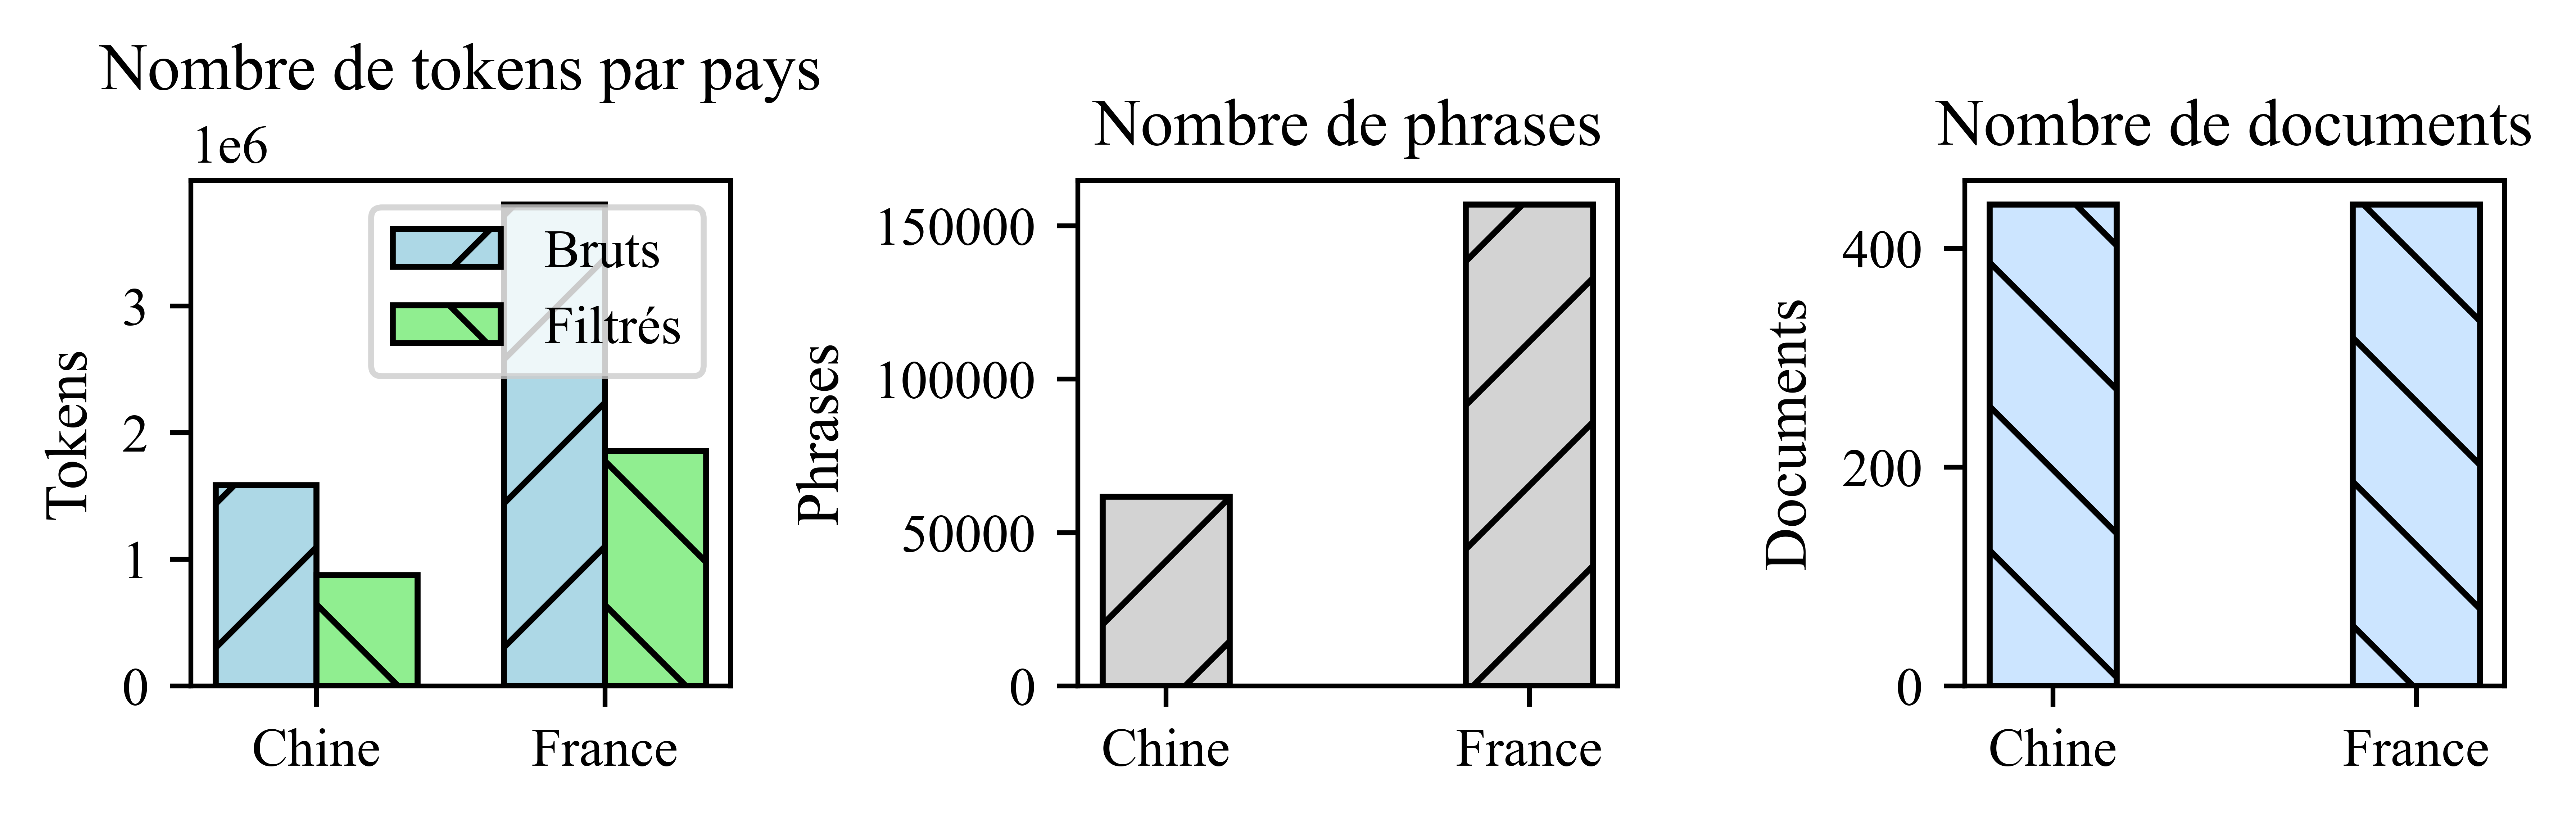

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from config import PROCESSED_DATA_DIR
from pathlib import Path

# 加载数据
corpus_stats = json.load(open(Path(PROCESSED_DATA_DIR) / "corpus_stats.json", "r"))
token_stats_by_country = corpus_stats["token_stats_by_country"]

# 构建 DataFrame
df = pd.DataFrame(token_stats_by_country).T
df.index = df.index.map(lambda x: {"china": "Chine", "france": "France"}[x])
df.index.name = "Pays"

# 准备并列位置
x = np.arange(len(df.index))  # 位置 [0, 1]
width = 0.35  # 柱子宽度

# 图像设置
plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "font.family": "Times New Roman",
    "mathtext.fontset": "stix" 
})

# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=1200)

# 图1：Tokens - side by side
axs[0].bar(x - width/2, df['total_tokens'], width, label="Bruts", color="#add8e6", hatch='/', edgecolor='black')
axs[0].bar(x + width/2, df['total_filtered_tokens'], width, label="Filtrés", color="#90ee90", hatch='\\', edgecolor='black')
axs[0].set_title("Nombre de tokens par pays")
axs[0].set_ylabel("Tokens")
axs[0].set_xticks(x)
axs[0].set_xticklabels(df.index)
axs[0].tick_params(axis='x', rotation=0)
axs[0].legend()

# 图2：Phrases
axs[1].bar(x, df['total_sentences'], width, color="#d3d3d3", hatch='/', edgecolor='black')
axs[1].set_title("Nombre de phrases")
axs[1].set_ylabel("Phrases")
axs[1].set_xticks(x)
axs[1].set_xticklabels(df.index)
axs[1].tick_params(axis='x', rotation=0)

# 图3：Documents
axs[2].bar(x, df['document_count'], width, color="#cce5ff", hatch='\\', edgecolor='black')
axs[2].set_title("Nombre de documents")
axs[2].set_ylabel("Documents")
axs[2].set_xticks(x)
axs[2].set_xticklabels(df.index)
axs[2].tick_params(axis='x', rotation=0)

# 导出与展示
plt.tight_layout()
plt.savefig("corpus_stats.svg", format="svg")
plt.savefig("corpus_stats.png", dpi=300)
plt.show()


In [17]:
corpus_stats

{'total_documents': 880,
 'documents_by_country': {'china': 440, 'france': 440},
 'documents_by_sector': {'education': 176,
  'financial': 176,
  'healthcare': 176,
  'industrial': 176,
  'public_services': 176},
 'documents_by_language': {'unknown': 880},
 'total_tokens': 5385755,
 'total_filtered_tokens': 2730047,
 'total_sentences': 218606,
 'average_tokens_per_document': 6120.176136363636,
 'average_sentences_per_document': 248.41590909090908,
 'token_stats_by_country': {'china': {'total_tokens': 1586286,
   'total_filtered_tokens': 875102,
   'total_sentences': 61669,
   'document_count': 440},
  'france': {'total_tokens': 3799469,
   'total_filtered_tokens': 1854945,
   'total_sentences': 156937,
   'document_count': 440}}}